In [1]:
from keras.layers import Input, Dense
from keras.models import Model


Using TensorFlow backend.


In [0]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [0]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.5344 - val_loss: 0.4594
Epoch 2/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.4249 - val_loss: 0.4049
Epoch 3/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.3935 - val_loss: 0.3853
Epoch 4/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.3756 - val_loss: 0.3696
Epoch 5/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.3615 - val_loss: 0.3573


**2.visualize the inputand reconstructed representationof the autoencoder using Matplotlib**

In [9]:
prediction = autoencoder.predict(x_test[0:])
prediction

array([[1.5690327e-03, 1.9554198e-03, 5.8808923e-04, ..., 5.9972405e-03,
        2.3566782e-03, 7.1671605e-04],
       [4.0697090e-05, 2.4084948e-05, 2.2025211e-05, ..., 2.5148094e-03,
        3.2696128e-04, 9.9983401e-05],
       [4.0400719e-05, 5.2491773e-06, 1.4907122e-04, ..., 8.7681413e-04,
        1.3726950e-04, 7.9168465e-05],
       ...,
       [5.5504143e-03, 1.6146898e-03, 3.6002994e-03, ..., 9.2867613e-03,
        7.1963668e-03, 3.9929152e-03],
       [1.6778708e-04, 3.6371555e-05, 5.8916211e-04, ..., 2.3181140e-03,
        3.9353967e-04, 3.0368567e-04],
       [3.6914349e-03, 5.5284798e-03, 2.4310648e-03, ..., 1.2442648e-02,
        5.5637956e-03, 2.3921430e-03]], dtype=float32)

INPUT DATA VISUALIZATION

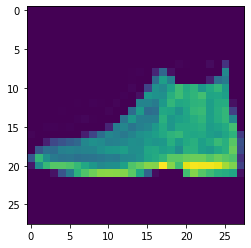

In [13]:
from matplotlib import pyplot as plt
plt.imshow(x_test[0].reshape(28,28))
plt.show()


RECONSTRUCTED IMAGE

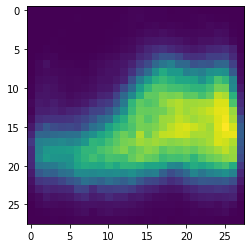

In [12]:
from matplotlib import pyplot as plt
plt.imshow(prediction[0].reshape(28,28))
plt.show()

**3. visualize the input, noisy inputand reconstructed representation(denosed output)of the Denosing_Autoencoder using Matplotlib**

In [15]:
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder1 = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder1.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder1.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.5294 - val_loss: 0.4575
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.4282 - val_loss: 0.4042
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.3973 - val_loss: 0.3850
Epoch 4/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.3824 - val_loss: 0.3710
Epoch 5/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.3708 - val_loss: 0.3591
Epoch 6/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.3609 - val_loss: 0.3490
Epoch 7/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.3528 - val_loss: 0.3405
Epoch 8/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.3462 - val_loss: 0.3336
Epoch 9/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.3410 - val_loss: 0.3280
Epoch

INPUT DATA


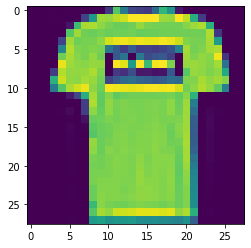

In [50]:
from matplotlib import pyplot as plt
plt.imshow(x_train[1].reshape(28,28))
plt.show()

ADDED NOISE

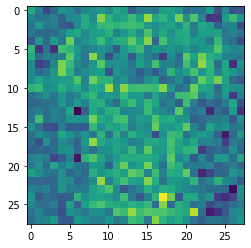

In [27]:
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[1].reshape(28,28))
plt.show()

In [0]:
prediction1 = autoencoder1.predict(x_train_noisy[1:])

DECODED NOISE


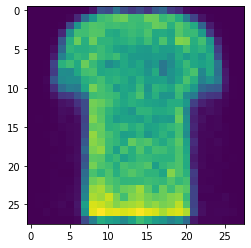

In [29]:
from matplotlib import pyplot as plt
plt.imshow(prediction1[0].reshape(28,28))
plt.show()

1. **ADDING A HIDDEN LAYER**

In [0]:
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
#addining a hidden layer
i=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(i)
# this model maps an input to its reconstruction
autoencoder1 = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder1.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)



In [48]:
history=autoencoder1.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.3923 - accuracy: 0.4915 - val_loss: 0.3750 - val_accuracy: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.3693 - accuracy: 0.4958 - val_loss: 0.3511 - val_accuracy: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.3500 - accuracy: 0.4993 - val_loss: 0.3324 - val_accuracy: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.3389 - accuracy: 0.5010 - val_loss: 0.3276 - val_accuracy: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.3331 - accuracy: 0.5018 - val_loss: 0.3172 - val_accuracy: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.3288 - accuracy: 0.5024 - val_loss: 0.3130 - val_accuracy: 0.0000e+00
Epoch 7/10
60000/60000 [==============

**4. GRAPH FOR ACCURACY AND LOSS**


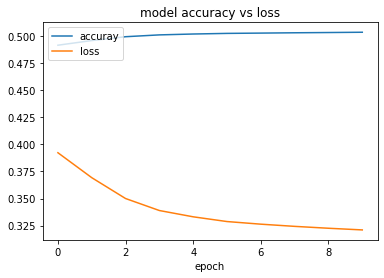

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model accuracy vs loss')
#plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()